In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = r'C:\Users\ytesc\OneDrive\Documentos\GitHub\Análise breja\datasetbreja.csv'
df_breja = pd.read_csv(file_path).dropna()
print(df_breja, df_breja.info())
df_breja #Lembrar que o dataset é relacionado ao ambiente universitário

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    object 
 2   Temperatura Minima (C)       365 non-null    object 
 3   Temperatura Maxima (C)       365 non-null    object 
 4   Precipitacao (mm)            365 non-null    object 
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 22.8+ KB
           Data Temperatura Media (C) Temperatura Minima (C)  \
0    2015-01-01                  27,3                   23,9   
1    2015-01-02                 27,02                   24,5   
2    2015-01-03                 24,82                   22,4   
3    2015-01-04                 23,98                   21,5   
4    2

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
...,...,...,...,...,...,...,...
360,2015-12-27,24,"21,1","28,2","13,6",1.0,32.307
361,2015-12-28,"22,64","21,1","26,7",0,0.0,26.095
362,2015-12-29,"21,68","20,3","24,1","10,3",0.0,22.309
363,2015-12-30,"21,38","19,3","22,4","6,3",0.0,20.467


<Axes: xlabel='Temperatura Maxima (C)', ylabel='Consumo de cerveja (litros)'>

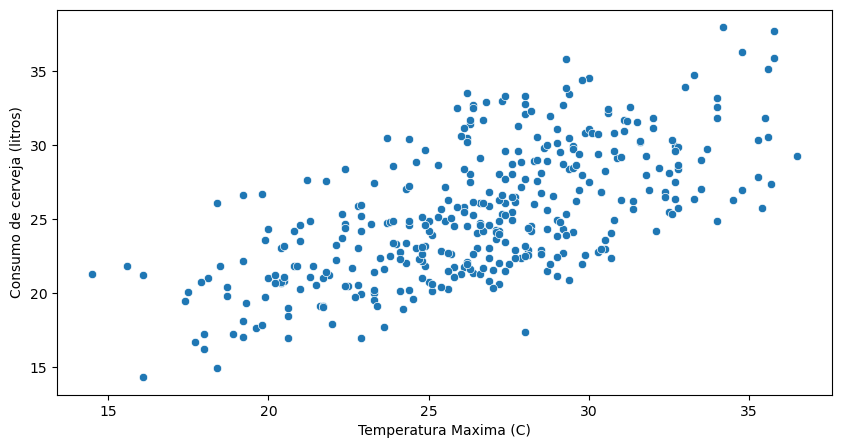

In [7]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = 'Temperatura Maxima (C)', y = 'Consumo de cerveja (litros)', data = df_breja)

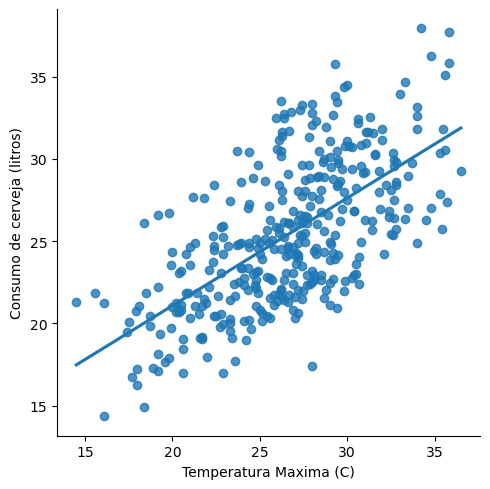

In [6]:
lista_corr = ['Temperatura Maxima (C)', 'Temperatura Minima (C)', 'Temperatura Media (C)']

for x in lista_corr:
    df_breja[x] = df_breja[x].astype(str).str.replace(',', '.').astype(float)

lista_corr.append('Consumo de cerveja (litros)')

sns.lmplot(x = 'Temperatura Maxima (C)', y = 'Consumo de cerveja (litros)', data = df_breja, ci = None)

<Axes: >

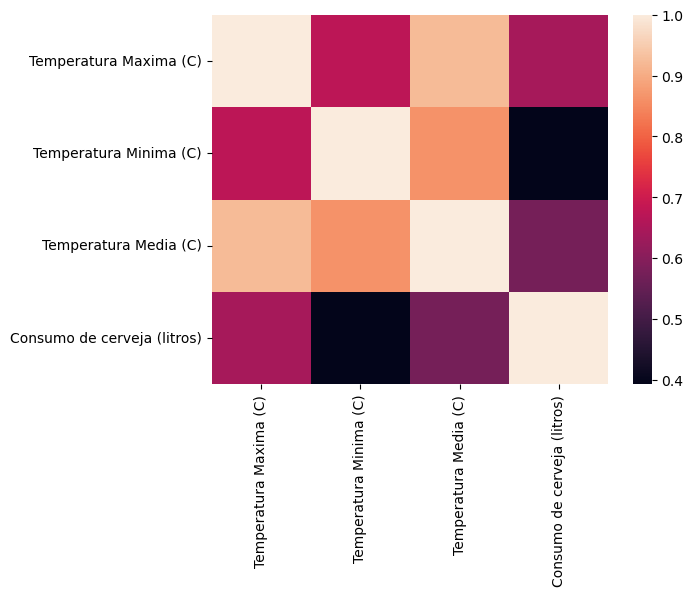

In [5]:
corr = df_breja[lista_corr]
heat = corr.corr()
sns.heatmap(heat)

<Axes: xlabel='Dia_da_Semana', ylabel='Consumo'>

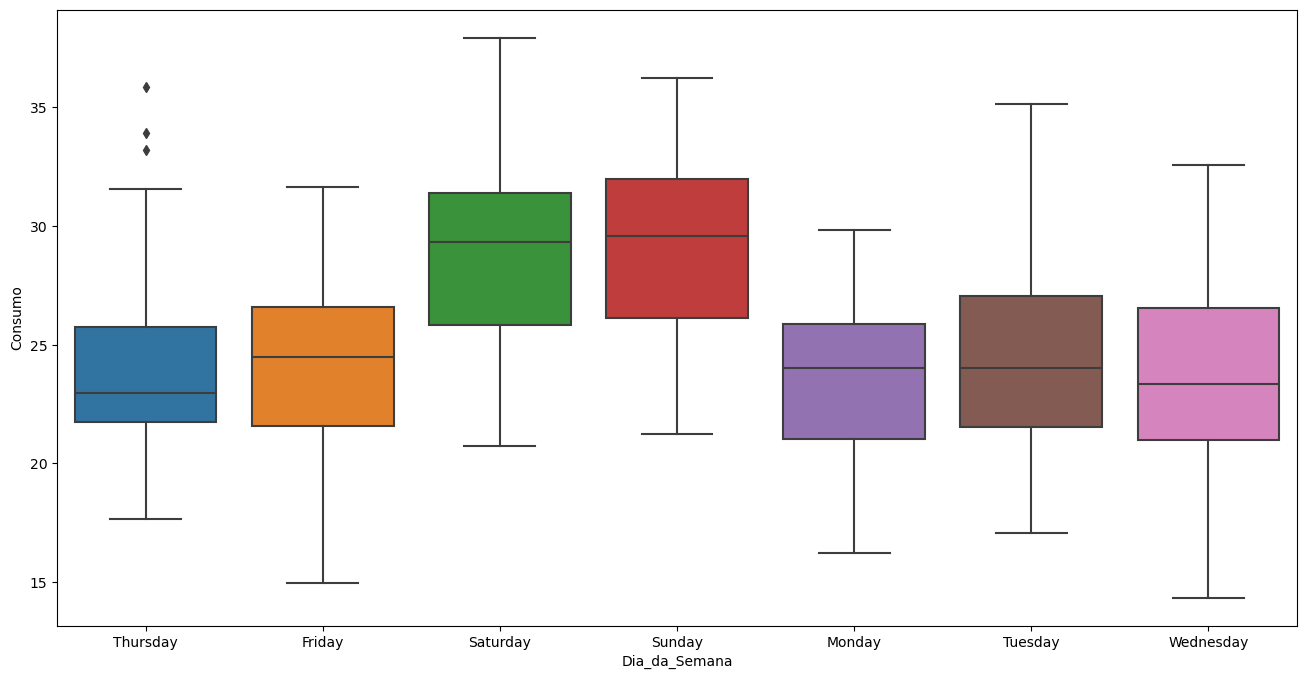

In [ ]:
df_breja['dia'] = pd.to_datetime(df_breja['dia'])
df_breja['Dia_da_Semana'] = df_breja['dia'].dt.day_name()
df_agrupado = df_breja.groupby('Dia_da_Semana').agg({'Temperatura Maxima (C)': 'mean', 'Consumo': 'mean'})

plt.figure(figsize=(16,8))
sns.boxplot(data = df_breja, x = 'Dia_da_Semana', y = 'Consumo')

In [ ]:
df_breja[df_breja['Dia_da_Semana'] == 'Thursday'] #Como são dados universitários, o maior consumo na quinta pode relacionar-se com eventos, volta às aulas, etc.

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Consumo,dia,consumo,log_consumo,Dia_da_Semana
0,2015-01-01,27.30,23.9,32.5,0,0.0,25.461,25.461,2015-01-01,25.461,3.275672,Thursday
7,2015-01-08,24.90,19.5,32.8,"48,6",0.0,28.397,28.397,2015-01-08,28.397,3.380893,Thursday
14,2015-01-15,25.86,21.5,32.8,3,0.0,25.724,25.724,2015-01-15,25.724,3.285562,Thursday
21,2015-01-22,21.74,19.2,26.1,31,0.0,25.795,25.795,2015-01-22,25.795,3.288215,Thursday
28,2015-01-29,25.00,21.5,29.2,0,0.0,22.696,22.696,2015-01-29,22.696,3.165306,Thursday
35,2015-02-05,20.28,19.1,22.9,"5,6",0.0,19.950,19.950,2015-02-05,19.950,3.042139,Thursday
42,2015-02-12,27.66,23.1,32.7,0,0.0,26.389,26.389,2015-02-12,26.389,3.310141,Thursday
49,2015-02-19,23.92,19.9,28.5,"2,4",0.0,22.922,22.922,2015-02-19,22.922,3.174799,Thursday
56,2015-02-26,24.10,19.2,30.3,"34,4",0.0,22.784,22.784,2015-02-26,22.784,3.169013,Thursday
63,2015-03-05,24.42,19.7,31.6,0,0.0,30.300,30.300,2015-03-05,30.300,3.443618,Thursday


In [9]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np

In [11]:
df_breja['consumo'] = df_breja['Consumo de cerveja (litros)'] 
df_breja['dia'] = df_breja['Data'] 
modelo_para_o_dia = ols('consumo ~ C(dia)', data=df_breja).fit()

anova_dia = sm.stats.anova_lm(modelo_para_o_dia, typ=2)
print(anova_dia)

C:\Users\ytesc\AppData\Roaming\Python\Python311\site-packages\statsmodels\regression\linear_model.py:1718: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


ValueError: r_matrix performs f_test for using dimensions that are asymptotically non-normal